In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#sd_test=pd.read_csv('/content/drive/MyDrive/project file/test.csv')
sd_train=pd.read_csv('/content/drive/MyDrive/project file/train.csv')
#sd_sample = pd.read_csv('/content/drive/MyDrive/project file/sample_submission.csv')

In [ ]:
sd_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
sd_train.shape

(614, 13)

In [ ]:
sd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **For the non-numerical values (e.g. Property_Area, Credit_History,etc.), we can look at frequency distribution to understand whether they make sense or not.**

In [ ]:
sd_train_len=len(sd_train)

In [ ]:
sd_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
sd_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# **Understanding the Distribution of Numerical Variables:**

* ApplicantIncome
* LoanAmount

In [ ]:
%matplotlib inline

In [ ]:
sd_train['ApplicantIncome'].hist

<bound method hist_series of 0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64>

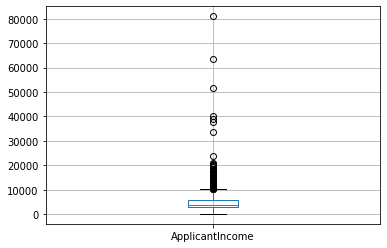

In [ ]:
sd_train.boxplot(column='ApplicantIncome')

# The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


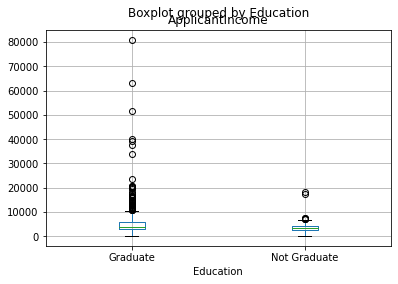

In [ ]:
sd_train.boxplot(column='ApplicantIncome', by='Education')

# ** We can see that there is no substantial different between the mean income of graduate and non-graduates. But graduates with a very high incomes are appearing to be the outliers **

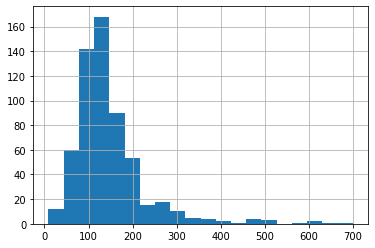

In [ ]:
sd_train['LoanAmount'].hist(bins=20)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


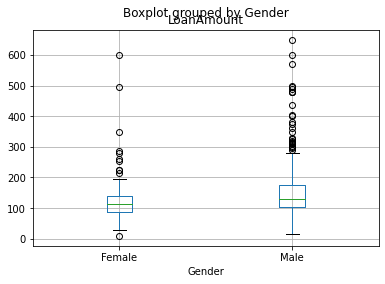

In [ ]:
sd_train.boxplot(column='LoanAmount', by='Gender')

# LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values.

# ***Understanding Distribution of Categorical Variables***

In [ ]:
# Loan approval rates in absolute numbers
loan_app=sd_train['Loan_Status'].value_counts()['Y']
print(loan_app)


422


# **Credit History and Loan Status**

In [ ]:
pd.crosstab(sd_train['Credit_History'] , sd_train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [ ]:
sd_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
sd_train['Gender'].fillna(sd_train['Gender'].mode()[0],inplace=True)

In [ ]:
sd_train['Married'].fillna(sd_train['Married'].mode()[0],inplace=True)

In [ ]:
sd_train['Dependents'].fillna(sd_train['Dependents'].mode()[0],inplace=True)

In [ ]:
sd_train['Self_Employed'].fillna(sd_train['Self_Employed'].mode()[0],inplace=True)

In [ ]:
sd_train.LoanAmount = sd_train.LoanAmount.fillna(sd_train.LoanAmount.mean())

In [ ]:
sd_train.Loan_Amount_Term = sd_train.Loan_Amount_Term.fillna(sd_train.Loan_Amount_Term.mean())

In [ ]:
sd_train.Credit_History = sd_train.Credit_History.fillna(sd_train.Credit_History.mean())

In [ ]:
sd_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
sd_train['Total_Income'] = sd_train['ApplicantIncome'] + sd_train['CoapplicantIncome']

In [ ]:
sd_train['Total_Income_log'] = np.log(sd_train['Total_Income'])

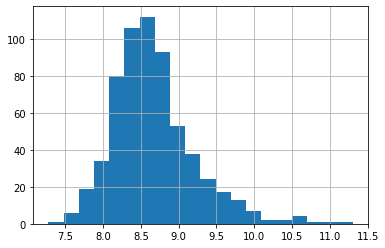

In [ ]:
sd_train['Total_Income_log'].hist(bins=20)

In [ ]:
sd_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515


In [ ]:
X = sd_train.iloc[:,np.r_[1:5,9:11,13:15]].values
X

array([['Male', 'No', '0', ..., 1.0, 5849.0, 8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 6091.0, 8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 8312.0, 9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 7583.0, 8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4583.0, 8.430109084509125]],
      dtype=object)

In [ ]:
Y = sd_train.iloc[:,12].values

In [ ]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [ ]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 13650.0 9.521494800613105]
 ['Male' 'Yes' '2' ... 0.8421985815602837 3760.0 8.23217423638394]
 ['Male' 'No' '1' ... 1.0 6177.0 8.728587995695898]
 ...
 ['Male' 'No' '0' ... 1.0 9508.0 9.159888828480085]
 ['Male' 'Yes' '3+' ... 1.0 2825.0 7.946263643580541]
 ['Female' 'No' '0' ... 1.0 4350.0 8.37793112408273]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_x = LabelEncoder()

In [ ]:
for i in range(0, 5):
  X_train[:,i]= label_x.fit_transform(X_train[:,i])



In [ ]:
 X_train[:,7] = label_x.fit_transform(X_train[:,7])

In [ ]:
X_train

array([[1, 1, 0, ..., 1.0, 13650.0, 419],
       [1, 1, 2, ..., 0.8421985815602837, 3760.0, 89],
       [1, 0, 1, ..., 1.0, 6177.0, 275],
       ...,
       [1, 0, 0, ..., 1.0, 9508.0, 380],
       [1, 1, 3, ..., 1.0, 2825.0, 20],
       [0, 0, 0, ..., 1.0, 4350.0, 136]], dtype=object)

In [ ]:
label_y = LabelEncoder()

In [ ]:
Y_train = label_y.fit_transform(Y_train)

In [ ]:
Y_train

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
for i in range(0, 5):
  X_test[:,i]= label_x.fit_transform(X_test[:,i])

In [ ]:
X_test[:,7] = label_x.fit_transform(X_test[:,7])

In [ ]:
label_y = LabelEncoder()
Y_test = label_y.fit_transform(Y_test)

In [ ]:
X_test

array([[1, 1, 0, 1, 5, 1.0, 4887.0, 41],
       [1, 1, 0, 0, 5, 1.0, 5461.0, 57],
       [1, 1, 0, 0, 5, 1.0, 5704.0, 66],
       [1, 1, 3, 0, 5, 0.0, 81000.0, 114],
       [0, 0, 0, 0, 5, 1.0, 5000.0, 44],
       [0, 0, 0, 0, 5, 0.8421985815602837, 4292.0, 30],
       [1, 1, 1, 0, 5, 1.0, 4022.0, 26],
       [1, 1, 0, 0, 5, 1.0, 5833.0, 70],
       [1, 1, 1, 0, 5, 1.0, 4014.0, 25],
       [0, 1, 0, 0, 5, 1.0, 6784.0, 83],
       [0, 1, 1, 0, 0, 1.0, 4239.0, 29],
       [1, 0, 0, 0, 5, 0.0, 6500.0, 80],
       [1, 1, 3, 1, 5, 1.0, 5703.0, 65],
       [1, 1, 2, 0, 5, 1.0, 8667.0, 92],
       [1, 0, 0, 0, 5, 1.0, 5316.0, 52],
       [0, 0, 0, 0, 5, 1.0, 2500.0, 4],
       [1, 0, 0, 0, 5, 1.0, 5050.0, 45],
       [1, 0, 0, 0, 5, 1.0, 6000.0, 72],
       [1, 1, 0, 1, 4, 0.0, 7686.0, 87],
       [1, 1, 1, 1, 5, 1.0, 4394.0, 33],
       [1, 0, 0, 0, 5, 1.0, 3750.0, 21],
       [1, 0, 0, 1, 3, 1.0, 2755.0, 7],
       [1, 1, 3, 0, 1, 1.0, 7740.0, 88],
       [1, 0, 0, 0, 5, 0.0, 10416.0, 103],

In [ ]:
Y_test

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sd = StandardScaler()

In [ ]:
e = sd.fit_transform(X_train)

In [ ]:
f = sd.fit_transform(X_test)

In [ ]:
e

array([[ 0.45429969,  0.73758061, -0.74496673, ...,  0.44233731,
         1.0794574 ,  1.47225646],
       [ 0.45429969,  0.73758061,  1.23757345, ..., -0.01788264,
        -0.53567191, -1.05050409],
       [ 0.45429969, -1.35578401,  0.24630336, ...,  0.44233731,
        -0.14095325,  0.3714155 ],
       ...,
       [ 0.45429969, -1.35578401, -0.74496673, ...,  0.44233731,
         0.40303014,  1.17411204],
       [ 0.45429969,  0.73758061,  2.22884354, ...,  0.44233731,
        -0.68836614, -1.57799038],
       [-2.20119015, -1.35578401, -0.74496673, ...,  0.44233731,
        -0.4393194 , -0.69120183]])

In [ ]:
f

array([[ 0.54289671,  0.69421013, -0.70958513,  1.84197099,  0.33164176,
         0.48833151, -0.27212525, -0.5036335 ],
       [ 0.54289671,  0.69421013, -0.70958513, -0.54289671,  0.33164176,
         0.48833151, -0.19689268, -0.01101385],
       [ 0.54289671,  0.69421013, -0.70958513, -0.54289671,  0.33164176,
         0.48833151, -0.16504335,  0.2660847 ],
       [ 0.54289671,  0.69421013,  2.26583433, -0.54289671,  0.33164176,
        -2.19071425,  9.70379217,  1.74394363],
       [-1.84197099, -1.44048603, -0.70958513, -0.54289671,  0.33164176,
         0.48833151, -0.25731466, -0.41126731],
       [-1.84197099, -1.44048603, -0.70958513, -0.54289671,  0.33164176,
         0.06557429, -0.35011023, -0.8423095 ],
       [ 0.54289671,  0.69421013,  0.28222136, -0.54289671,  0.33164176,
         0.48833151, -0.38549837, -0.96546441],
       [ 0.54289671,  0.69421013, -0.70958513, -0.54289671,  0.33164176,
         0.48833151, -0.14813568,  0.38923961],
       [ 0.54289671,  0.69421013

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
g = LogisticRegression()

In [ ]:
g.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
predict = g.predict(X_test)
predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
predicted = label_y.inverse_transform(predict)

In [ ]:
X_test['Loan_Status']=predict

IndexError: ignored